# 1. Special Bus Line

Consider the public transport bus service. It has many gates on roads in the city and a particular lane for bus transportation.


This lane is also used for the transportation of emergency vehicles like ambulances, police cars and fire trucks, and private cars are banned from using it.


Your task is to create a system to classify these two classes of vehicles.

In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

In [0]:
!pip install google_images_download
import cv2
!mkdir ./images/
!mkdir ./training/
!mkdir ./test/
!mkdir ./validation/
!mkdir ./training/allowed
!mkdir ./training/not_allowed
!mkdir ./test/allowed
!mkdir ./test/not_allowed
!mkdir ./validation/allowed
!mkdir ./validation/not_allowed



mkdir: cannot create directory ‘./images/’: File exists
mkdir: cannot create directory ‘./training/’: File exists
mkdir: cannot create directory ‘./test/’: File exists
mkdir: cannot create directory ‘./validation/’: File exists
mkdir: cannot create directory ‘./training/allowed’: File exists
mkdir: cannot create directory ‘./training/not_allowed’: File exists
mkdir: cannot create directory ‘./test/allowed’: File exists
mkdir: cannot create directory ‘./test/not_allowed’: File exists
mkdir: cannot create directory ‘./validation/allowed’: File exists
mkdir: cannot create directory ‘./validation/not_allowed’: File exists


In [0]:
!apt update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin


Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages [79.8 kB]
Get:12 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Pa

In [0]:
# !pip install tensorflow-gpu

In [0]:
from google_images_download import google_images_download   #importing the library

response = google_images_download.googleimagesdownload()   #class instantiation

arguments = {"keywords":"bus,police car ,ambulance,fire truck","limit":100,"format":"jpg","image_directory":"allowed","size":">800*600","chromedriver":'/usr/lib/chromium-browser/chromedriver'}   #creating list of arguments

bus_paths = response.download(arguments)   #passing the arguments to the function



Item no.: 1 --> Item name = bus
Evaluating...
Starting Download...
Completed Image ====> 1.CTY-BUSING23-5.JPG
Completed Image ====> 2.DlsmI_KWwAA5N8_.0.jpg
Completed Image ====> 3.LT_471_%28LTZ_1471%29_Arriva_London_New_Routemaster_%2819522859218%29.jpg
Completed Image ====> 4.wikicommonsm42.0.jpg
Completed Image ====> 5.Transpo_UTA-541063240.jpg
Completed Image ====> 6.RTR3CHPW.jpg
Completed Image ====> 7.home-ss-1-1024x678.jpg
Completed Image ====> 8.tcapsbus.jpg
Completed Image ====> 9.20190917dsElizabethForwardBusLocal03-2-1568804563.jpg
Completed Image ====> 10.190929_gma_gonzalez1_hpMain_16x9_992.jpg
Completed Image ====> 11.BYD-K7M-electric-bus.jpg
Completed Image ====> 12.tata-ultra-urban-9-9-electric-ac-bus.jpg
Completed Image ====> 13.Fall-Buses-2019.jpg
URLError on an image...trying next one... Error: HTTP Error 403: Forbidden - Reason:2
Completed Image ====> 14.bus%20line.JPG
Completed Image ====> 15.TransMio_de_Villa_Nueva_GT.jpg
Completed Image ====> 16.fourlinks_yellows

In [0]:
response = google_images_download.googleimagesdownload()   #class instantiation
arguments1 = {"keywords":"car in street","limit":300,"image_directory":"not_allowed","format":"jpg","type":"photo","chromedriver":'/usr/lib/chromium-browser/chromedriver'}   #creating list of arguments

car_paths = response.download(arguments1)   #passing the arguments to the function



Item no.: 1 --> Item name = car in street
Evaluating...
Getting you a lot of images. This may take a few moments...
Reached end of Page.
Starting Download...
Completed Image ====> 1.how_far_away_must_you_park_from_a_driveway_800x450-1.jpg
Completed Image ====> 2.62bddd2a-89ab-11e7-8a03-f21d91374892-780x429.jpg
Completed Image ====> 3.JS137424394.jpg
Completed Image ====> 4.Google_Street_View_Car_in_Aranjuez.jpg
Completed Image ====> 5.drivers-park-car-in-middle-of-street-to-avoid-alternate-side-tickets.jpg
Completed Image ====> 6.many-car-street-15244647.jpg
Completed Image ====> 7.18502939_web1_190913-sfe-tenderloincollision-001.jpg
URLError on an image...trying next one... Error: HTTP Error 404: Not Found
Completed Image ====> 8.20180808%20-%20Zipcar%20Carshare%20Pilot%20N12th%20and%20Bedford%20BK%20-IMG_4698%20-%20lo%20res.jpg
Completed Image ====> 9.Google_Street_View_Car_in_Honolulu.jpg
Completed Image ====> 10.new_car_old_street.jpg
Completed Image ====> 11.191105_kabc_hit_run1_

In [0]:
# !rm /content/validation/not_allowed/* 
# !rm /content/training/not_allowed/* 

In [0]:
import os
import shutil  
  
# path    
# List files and directories  
# in 'C:/Users/Rajnish/Desktop/GeeksforGeeks'  
def split_data(dir):
  base_dir = "/content/downloads/"+dir+"/"
  training_dir = "/content/training/"+dir+"/"
  validation_dir = "/content/validation/"+dir+"/"
  test_dir = "/content/test/"+dir+"/"
  images = os.listdir(base_dir)
  images_count = len(images)
  training_size = int(images_count*0.6) 
  validation_size = int(images_count*0.8) 
  test_size = int(images_count*1)
  cnt = 0
  for image in images:
    if(cnt<=training_size):
      shutil.move(base_dir+image, training_dir+dir+str(cnt)+".jpg")  
    elif(cnt<=validation_size):
      shutil.move(base_dir+image, validation_dir+dir+str(cnt)+".jpg")  
    else:
      shutil.move(base_dir+image, test_dir+dir+str(cnt)+".jpg")  
    cnt += 1
  
  return training_size,test_size,validation_size

training_size1,test_size1,validation_size1 = split_data('allowed')
training_size2,test_size2,validation_size2 = split_data('not_allowed')

training_size = training_size1 + training_size2
test_size = test_size1 + test_size2
validation_size = validation_size1 + validation_size2

In [0]:
!pip install piexif
from os import listdir
from PIL import Image
import piexif
import cv2
def check(base_dir):
  for filename in listdir(base_dir):
    if filename.endswith('.jpg'):
      try:
        # print(base_dir+filename)
        # piexif.remove(base_dir+filename)
        img = Image.open(base_dir+filename) # open the image file
        img.verify() # verify that it is, in fact an image
        image =  cv2.imread(base_dir+filename)
        resized_image =  cv2.resize(image,(150,150),interpolation = cv2.INTER_AREA)
        os.remove(base_dir+filename)
        cv2.imwrite(base_dir+filename,resized_image)
        # imResize = img.resize((200,200), Image.ANTIALIAS)
        # os.remove(base_dir+filename)
        # imResize.save(base_dir+filename, 'JPEG', quality=90)

      except (IOError, SyntaxError) as e:
        os.remove(base_dir+filename)

check("/content/downloads/allowed/")
check("/content/downloads/not_allowed/")
check("/content/training/allowed/")
check("/content/training/not_allowed/")
check("/content/test/allowed/")
check("/content/test/not_allowed/")
check("/content/validation/allowed/")
check("/content/validation/not_allowed/")


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'training',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    'validation',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')


test_generator = test_datagen.flow_from_directory(
    'test',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 474 images belonging to 2 classes.
Found 156 images belonging to 2 classes.
Found 157 images belonging to 2 classes.


In [0]:
from keras.optimizers import Adam
from keras import backend as K

def recall(y_true, y_pred):

    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def precision(y_true, y_pred):

    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def f1(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * ((p * r) / (p + r))

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras import models
from keras import layers
from keras.applications.imagenet_utils import preprocess_input
from keras import optimizers
from keras import metrics

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=["accuracy",f1,recall,precision,metrics.binary_accuracy])
model.summary()
history = model.fit_generator(
      train_generator,
      steps_per_epoch=20,
      epochs=40,
      validation_data=validation_generator,
      validation_steps=50)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 36992)            

loss : 0.5940499567681816
acc : 0.7070063736028732
f1 : 0.5979216277219688
recall : 0.5745222993717072
precision : 0.6495046061315354
binary_accuracy : 0.7070063736028732


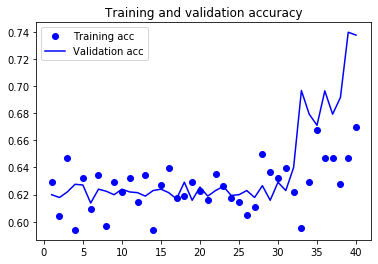

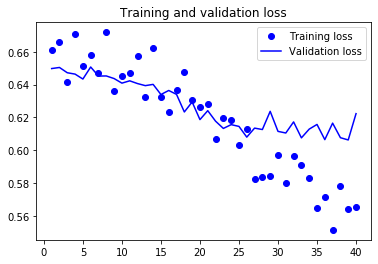

In [0]:
scores = model.evaluate_generator(test_generator)
for i in range(len(scores)):
  print(str(list(model.metrics_names)[i])+" : "+ str(scores[i]))

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

The metrics were improving so trained it more  and result got better so i extend  main fit 20 more epochs

In [0]:
# history = model.fit_generator(
#       train_generator,
#       steps_per_epoch=50,
#       epochs=20,
#       validation_data=validation_generator,
#       validation_steps=50)

The metrics were still improving so trained it more  but results got bad so i commented it

In [0]:
# history = model.fit_generator(
#       train_generator,
#       steps_per_epoch=50,
#       epochs=10,
#       validation_data=validation_generator,
#       validation_steps=50)

In [0]:
scores = model.evaluate_generator(test_generator)
print(scores)
for i in range(len(scores)):
  print(str(list(model.metrics_names)[i])+" : "+ str(scores[i]))
print(model.metrics_names)

[0.5763493051194841, 0.7388535092590721, 0.5407768419593763, 0.4346651298225306, 0.7355171411660066, 0.7388535092590721]
loss : 0.5763493051194841
acc : 0.7388535092590721
f1 : 0.5407768419593763
recall : 0.4346651298225306
precision : 0.7355171411660066
binary_accuracy : 0.7388535092590721
['loss', 'acc', 'f1', 'recall', 'precision', 'binary_accuracy']


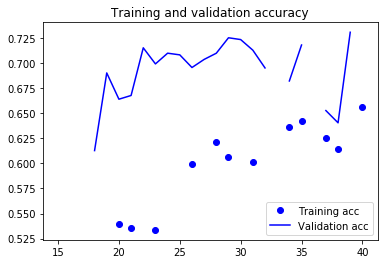

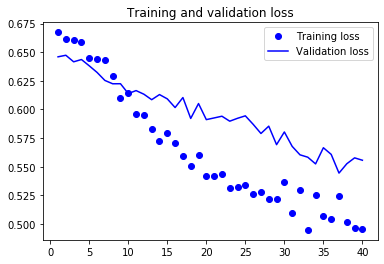

In [0]:
import matplotlib.pyplot as plt

acc = history.history['f1']
val_acc = history.history['val_f1']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

As you can see result got worst at first it was 78 percent accuracy but it go to  72 so i deleted that



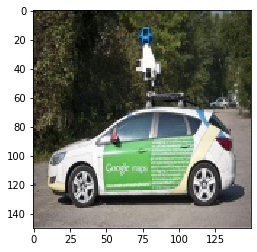

[[0.]]


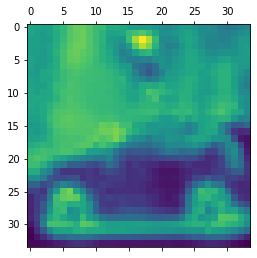

In [0]:
from keras.preprocessing import image
from keras import backend as K
import numpy as np


img = image.load_img('/content/test/not_allowed/not_allowed285.jpg', target_size=(150, 150))
# img = image.load_img('/content/validation/not_allowed/not_allowed196.jpg', target_size=(150, 150))

plt.imshow(img)
plt.show()

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
predict = model.predict(x)
print(predict)

output = model.output[:, 0]
conv_layer = model.get_layer(index=4)
grads = K.gradients(output, conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input],[pooled_grads, conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(64):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output_value, axis=-1)

%matplotlib inline
import matplotlib.pyplot as plt

heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

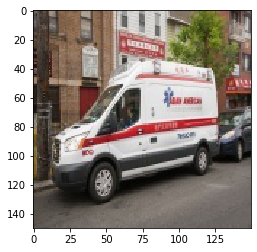

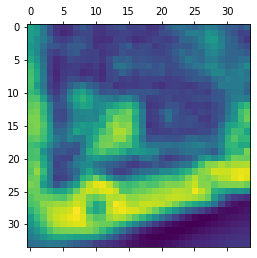

In [0]:
from keras.preprocessing import image
from keras import backend as K
import numpy as np


# img = image.load_img('/content/test/not_allowed/not_allowed285.jpg', target_size=(150, 150))
img = image.load_img('/content/training/allowed/allowed199.jpg', target_size=(150, 150))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

output = model.output[:, 0]
conv_layer = model.get_layer(index=4)
grads = K.gradients(output, conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input],[pooled_grads, conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(64):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output_value, axis=-1)

%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(img)
plt.show()


heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

Visualize some layers and analyze them.

$\color{red}{\text{In above cell is you can see that bus edges and tires are most important features for network but front side of bus and also it's mirrors are activates too}}$

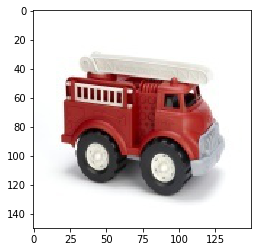

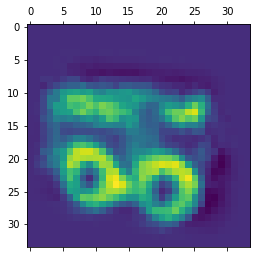

In [0]:
from keras.preprocessing import image
from keras import backend as K
import numpy as np

# img = image.load_img('/content/test/allowed/allowed216.jpg', target_size=(150, 150))
# img = image.load_img('/content/validation/not_allowed/not_allowed207.jpg', target_size=(150, 150))
img = image.load_img('/content/test/allowed/allowed425.jpg', target_size=(150, 150))
output = model.output[:, 0]
conv_layer = model.get_layer(index=4)
grads = K.gradients(output, conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input],[pooled_grads, conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(64):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output_value, axis=-1)

%matplotlib inline
import matplotlib.pyplot as plt

heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

plt.imshow(img)
plt.show()
plt.matshow(heatmap)

In above cell is you can see that car edges and tires are most important  features for network 

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import metrics

model1 = Sequential()
model1.add(Conv2D(32, (3, 3), input_shape=( 150, 150,3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(64, (3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(64, (3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten()) 
model1.add(Dropout(0.5))
model1.add(Dense(64))
model1.add(Activation('relu'))
model1.add(Dropout(0.5))
model1.add(Dense(32))
model1.add(Activation('relu'))
model1.add(Dense(1))
model1.add(Activation('sigmoid'))


model1.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=["accuracy",f1,recall,precision,metrics.binary_accuracy])

history1 = model1.fit_generator(
      train_generator,
      steps_per_epoch=200,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/50
200/200 [==============================] - 167s 836ms/step - loss: 0.6618 - acc: 0.6104 - f1: nan - recall: 0.0438 - precision: 0.1087 - binary_accuracy: 0.6104 - val_loss: 0.6495 - val_acc: 0.6189 - val_f1: nan - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_binary_accuracy: 0.6189
Epoch 2/50
200/200 [==============================] - 165s 823ms/step - loss: 0.6496 - acc: 0.6217 - f1: nan - recall: 0.0038 - precision: 0.0225 - binary_accuracy: 0.6217 - val_loss: 0.6400 - val_acc: 0.6260 - val_f1: nan - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_binary_accuracy: 0.6260
Epoch 3/50
200/200 [==============================] - 165s 827ms/step - loss: 0.6358 - acc: 0.6221 - f1: nan - recall: 0.0012 - precision: 0.0100 - binary_accuracy: 0.6221 - val_loss: 0.6341 - val_acc: 0.6199 - val_f1: nan - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_binary_accuracy: 0.6199
Epoch 4/50
200/200 [==============================] - 166s 828ms/step - loss: 0.61

In [0]:
scores = model1.evaluate_generator(test_generator)
print(scores)
for i in range(len(scores)):
  print(str(list(model1.metrics_names)[i])+" : "+ str(scores[i]))
print(model1.metrics_names)

[0.5019137665724299, 0.7770700674907417, 0.618481225268856, 0.536447282050066, 0.753412198109232, 0.7770700674907417]
loss : 0.5019137665724299
acc : 0.7770700674907417
f1 : 0.618481225268856
recall : 0.536447282050066
precision : 0.753412198109232
binary_accuracy : 0.7770700674907417
['loss', 'acc', 'f1', 'recall', 'precision', 'binary_accuracy']


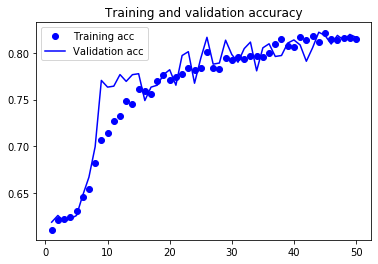

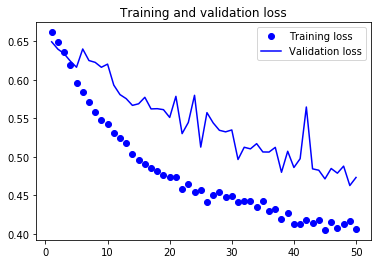

In [0]:
import matplotlib.pyplot as plt

acc = history1.history['acc']
val_acc = history1.history['val_acc']
f1 = history1.history['val_f1']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
model1.save('my_model.h5')

In [0]:
history2 = model1.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/20
100/100 [==============================] - 57s 567ms/step - loss: 0.4642 - acc: 0.7746 - f1: 0.6805 - recall: 0.6900 - precision: 0.7195 - binary_accuracy: 0.7746 - val_loss: 0.5280 - val_acc: 0.8053 - val_f1: 0.7064 - val_recall: 0.6678 - val_precision: 0.7859 - val_binary_accuracy: 0.8053
Epoch 2/20
100/100 [==============================] - 55s 552ms/step - loss: 0.4629 - acc: 0.7739 - f1: 0.6811 - recall: 0.6879 - precision: 0.7209 - binary_accuracy: 0.7739 - val_loss: 0.5501 - val_acc: 0.8094 - val_f1: 0.7001 - val_recall: 0.6381 - val_precision: 0.8315 - val_binary_accuracy: 0.8094
Epoch 3/20
100/100 [==============================] - 55s 555ms/step - loss: 0.4632 - acc: 0.7743 - f1: 0.6677 - recall: 0.6637 - precision: 0.7122 - binary_accuracy: 0.7743 - val_loss: 0.5060 - val_acc: 0.8258 - val_f1: 0.7347 - val_recall: 0.6792 - val_precision: 0.8181 - val_binary_accuracy: 0.8258
Epoch 4/20
100/100 [==============================] - 55s 554ms/step - loss: 0.4469 - acc: 

In [0]:
scores = model1.evaluate_generator(test_generator)
print(scores)
for i in range(len(scores)):
  print(str(list(model1.metrics_names)[i])+" : "+ str(scores[i]))
print(model1.metrics_names)

[0.5335588451403721, 0.7707006373223225, 0.6188670096883349, 0.5849256963486884, 0.7201091973644913, 0.7707006373223225]
loss : 0.5335588451403721
acc : 0.7707006373223225
f1 : 0.6188670096883349
recall : 0.5849256963486884
precision : 0.7201091973644913
binary_accuracy : 0.7707006373223225
['loss', 'acc', 'f1', 'recall', 'precision', 'binary_accuracy']


In [0]:
history2 = model1.fit_generator(
      train_generator,
      steps_per_epoch=10,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/20
100/100 [==============================] - 57s 568ms/step - loss: 0.4401 - acc: 0.7775 - f1: nan - recall: 0.6892 - precision: 0.7157 - binary_accuracy: 0.7775 - val_loss: 0.4910 - val_acc: 0.8033 - val_f1: 0.7377 - val_recall: 0.7800 - val_precision: 0.7209 - val_binary_accuracy: 0.8033
Epoch 2/20
100/100 [==============================] - 55s 552ms/step - loss: 0.4150 - acc: 0.8118 - f1: 0.7257 - recall: 0.7329 - precision: 0.7593 - binary_accuracy: 0.8118 - val_loss: 0.4900 - val_acc: 0.8268 - val_f1: 0.7604 - val_recall: 0.7615 - val_precision: 0.7744 - val_binary_accuracy: 0.8268
Epoch 3/20
100/100 [==============================] - 56s 561ms/step - loss: 0.4267 - acc: 0.8031 - f1: 0.7274 - recall: 0.7305 - precision: 0.7574 - binary_accuracy: 0.8031 - val_loss: 0.4991 - val_acc: 0.8012 - val_f1: 0.7532 - val_recall: 0.8507 - val_precision: 0.6919 - val_binary_accuracy: 0.8012
Epoch 4/20
100/100 [==============================] - 56s 558ms/step - loss: 0.4285 - acc: 0.7

In [0]:
scores = model1.evaluate_generator(test_generator)
print(scores)
for i in range(len(scores)):
  print(str(list(model1.metrics_names)[i])+" : "+ str(scores[i]))
print(model1.metrics_names)

[0.526388717115305, 0.7707006430170339, 0.6657754790251422, 0.64897381803792, 0.7134263515472412, 0.7707006430170339]
loss : 0.526388717115305
acc : 0.7707006430170339
f1 : 0.6657754790251422
recall : 0.64897381803792
precision : 0.7134263515472412
binary_accuracy : 0.7707006430170339
['loss', 'acc', 'f1', 'recall', 'precision', 'binary_accuracy']


In [0]:
from keras.preprocessing import image
from keras import backend as K
import numpy as np

from keras.applications.imagenet_utils import preprocess_input
scores = model.evaluate_generator(test_generator)


# img = image.load_img('/content/test/allowed/allowed216.jpg', target_size=(150, 150))
# img = image.load_img('/content/validation/not_allowed/not_allowed207.jpg', target_size=(150, 150))
img = image.load_img('/content/test/allowed/allowed425.jpg', target_size=(150, 150))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
predict = model1.predict(x)

print(predict)

output = model1.output[:, 0]
conv_layer = model1.get_layer(index=4)
grads = K.gradients(output, conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model1.input],[pooled_grads, conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(64):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output_value, axis=-1)

%matplotlib inline
import matplotlib.pyplot as plt

heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

plt.imshow(img)
plt.show()
plt.matshow(heatmap)

NameError: ignored

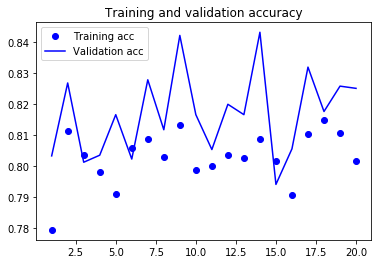

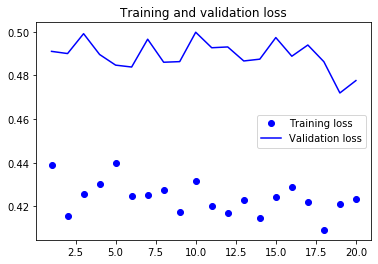

In [0]:
import matplotlib.pyplot as plt

acc = history2.history['acc']
val_acc = history2.history['val_acc']

# f1 = history1.history['f1']
# val_f1 = history1.history['val_f1']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(acc) + 1)


# plt.plot(epochs, f1, 'bo', label='Training f1')
# plt.plot(epochs, val_f1, 'b', label='Validation f1')
# plt.title('Training and validation accuracy')
# plt.legend()

# plt.figure()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

as you can see network accuracy got a little better so if i learn it more it possibly get better but also not having prefect dataset affect the results alot

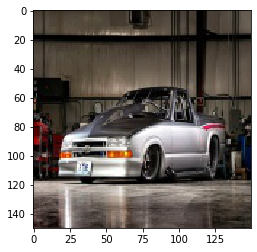

[[0.]]
Colors are so similar to police cars 


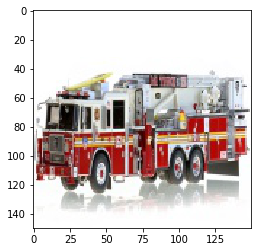

[[0.]]


In [0]:
img = image.load_img('/content/test/not_allowed/not_allowed261.jpg', target_size=(150, 150))
plt.imshow(img)
plt.show()

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
predict = model1.predict(x)
print(predict)
print("Colors are so similar to police cars ")
img = image.load_img('/content/test/allowed/allowed394.jpg', target_size=(150, 150))
plt.imshow(img)
plt.show()

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
predict = model.predict(x)
print(predict)


As you can see in above some images aren't satisfing their purpose

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import metrics

model2 = Sequential()
model2.add(Conv2D(32, (3, 3), input_shape=( 150, 150,3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(128, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten()) 
model2.add(Dropout(0.5))
model2.add(Dense(32))
model2.add(Activation('relu'))
model2.add(Dense(1))
model2.add(Activation('sigmoid'))


model2.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=["accuracy",f1,recall,precision,metrics.binary_accuracy])

history11= model2.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/50
100/100 [==============================] - 100s 1s/step - loss: 0.6475 - acc: 0.6176 - f1: nan - recall: 0.0027 - precision: 0.0075 - binary_accuracy: 0.6176 - val_loss: 0.6372 - val_acc: 0.6189 - val_f1: nan - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_binary_accuracy: 0.6189
Epoch 2/50
100/100 [==============================] - 98s 980ms/step - loss: 0.6198 - acc: 0.6220 - f1: nan - recall: 0.0043 - precision: 0.0060 - binary_accuracy: 0.6220 - val_loss: 0.6154 - val_acc: 0.6250 - val_f1: nan - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_binary_accuracy: 0.6250
Epoch 3/50
100/100 [==============================] - 98s 985ms/step - loss: 0.5898 - acc: 0.6409 - f1: nan - recall: 0.0813 - precision: 0.2551 - binary_accuracy: 0.6409 - val_loss: 0.6096 - val_acc: 0.6404 - val_f1: nan - val_recall: 0.0540 - val_precision: 0.3607 - val_binary_accuracy: 0.6404
Epoch 4/50
100/100 [==============================] - 98s 982ms/step - loss: 0.5645 - acc: 0.66

loss : 0.46015121526778885
acc : 0.7579617826801957
f1 : 0.6541415312487608
recall : 0.6403479762138076
precision : 0.731808532195486
binary_accuracy : 0.7579617826801957


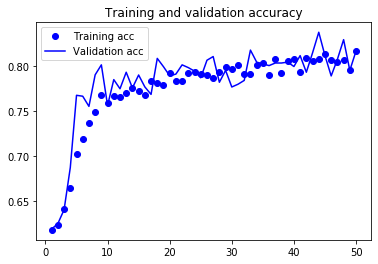

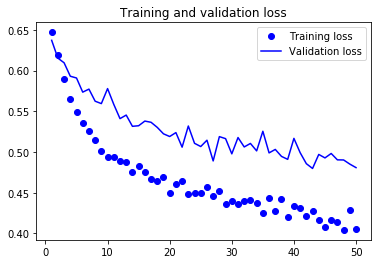

In [0]:
scores = model2.evaluate_generator(test_generator)
for i in range(len(scores)):
  print(str(list(model2.metrics_names)[i])+" : "+ str(scores[i]))
import matplotlib.pyplot as plt

acc = history11.history['acc']
val_acc = history11.history['val_acc']

# f1 = history1.history['f1']
# val_f1 = history1.history['val_f1']

loss = history11.history['loss']
val_loss = history11.history['val_loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

i think that classifing ambulance and fire truck and bus and police cars are making the classifier confused  because based on previous observations more of misclassified results are from class "allowed"

## **Therfore better method to use is to train model to classify each type of car or fire truck .. and bus and then classify and get result based on that.**





In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras import models
from keras import layers
from keras.applications.imagenet_utils import preprocess_input
from keras import optimizers

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

model3 = models.Sequential()
model3.add(conv_base)
model3.add(layers.Flatten())
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))


model3.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=["accuracy",f1,recall,precision,metrics.binary_accuracy])

history3= model3.fit_generator(
      train_generator,
      steps_per_epoch=10,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/20
10/10 [==============================] - 372s 37s/step - loss: 0.5942 - acc: 0.6905 - f1: nan - recall: 0.5178 - precision: 0.6068 - binary_accuracy: 0.6905 - val_loss: 0.4593 - val_acc: 0.7992 - val_f1: nan - val_recall: 0.5721 - val_precision: 0.8445 - val_binary_accuracy: 0.7992
Epoch 2/20
10/10 [==============================] - 374s 37s/step - loss: 0.5983 - acc: 0.6750 - f1: nan - recall: 0.4008 - precision: 0.6067 - binary_accuracy: 0.6750 - val_loss: 0.5129 - val_acc: 0.7418 - val_f1: nan - val_recall: 0.3806 - val_precision: 0.8468 - val_binary_accuracy: 0.7418
Epoch 3/20
10/10 [==============================] - 376s 38s/step - loss: 0.5144 - acc: 0.7650 - f1: 0.6008 - recall: 0.5411 - precision: 0.8462 - binary_accuracy: 0.7650 - val_loss: 0.5839 - val_acc: 0.6752 - val_f1: nan - val_recall: 0.2037 - val_precision: 0.6837 - val_binary_accuracy: 0.6752
Epoch 4/20
10/10 [==============================] - 369s 37s/step - loss: 0.4332 - acc: 0.7955 - f1: 0.6908 - recal

loss : 0.4861594506889392
acc : 0.7961783409118652
f1 : 0.7569954550949631
recall : 0.8708421789157162
precision : 0.692407030778326
binary_accuracy : 0.7961783409118652


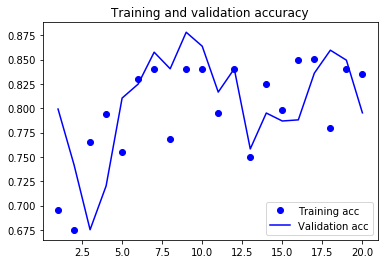

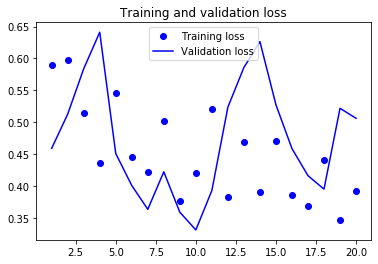

In [0]:
scores = model3.evaluate_generator(test_generator)
for i in range(len(scores)):
  print(str(list(model3.metrics_names)[i])+" : "+ str(scores[i]))
import matplotlib.pyplot as plt

acc = history3.history['acc']
val_acc = history3.history['val_acc']

# f1 = history1.history['f1']
# val_f1 = history1.history['val_f1']

loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras import models
from keras import layers
from keras.applications.imagenet_utils import preprocess_input
from keras import optimizers

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

model4 = models.Sequential()
model4.add(conv_base)
model4.add(layers.Flatten())
model4.add(layers.Dense(64, activation='relu'))
model4.add(layers.Dense(1, activation='sigmoid'))


model4.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=["accuracy",f1,recall,precision,metrics.binary_accuracy])

history4= model4.fit_generator(
      train_generator,
      steps_per_epoch=10,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/10
10/10 [==============================] - 373s 37s/step - loss: 0.6642 - acc: 0.6604 - f1: nan - recall: 0.3293 - precision: 0.4992 - binary_accuracy: 0.6604 - val_loss: 0.5518 - val_acc: 0.7695 - val_f1: 0.5946 - val_recall: 0.4862 - val_precision: 0.8478 - val_binary_accuracy: 0.7695
Epoch 2/10
 4/10 [===========>..................] - ETA: 1:38 - loss: 0.5898 - acc: 0.6875 - f1: 0.5583 - recall: 0.4438 - precision: 0.7804 - binary_accuracy: 0.6875

Ass you can see model got overfitted in 10 epoch so it could have much more accuracy


my instance got cut in middle of this and it take so much time i ignore it

In [0]:
scores = model4.evaluate_generator(test_generator)
for i in range(len(scores)):
  print(str(list(model3.metrics_names)[i])+" : "+ str(scores[i]))
import matplotlib.pyplot as plt

acc = history4.history['acc']
val_acc = history4.history['val_acc']

# f1 = history1.history['f1']
# val_f1 = history1.history['val_f1']

loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

$\color{red}{\text{loss is binary_crossentropy  because it's so efficient for binary classification ann accucacy metric is binary_accuracy which their result is about 80 percent accuracy}}$